In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
functions = {'x': lambda x: x, 'x^2': lambda x: x * x, 'sin(x)': lambda x: np.sin(x),
             'sin(x^2)': lambda x: np.sin(x * x), 'sin(x)/x': lambda x: np.sin(x) / x}
X = np.linspace(0, 10, 100)

In [3]:
def fft(coefs):
    if(coefs.shape[0] == 1):
        if(np.isnan(coefs)):
            return np.zeros((1))
        return coefs
        
    coefs_0 = fft(coefs[0::2])
    coefs_1 = fft(coefs[1::2])

    w_n = np.exp(1j * np.pi * np.arange(coefs_0.shape[0]) / coefs_0.shape[0])
    return np.concatenate((coefs_0 + w_n * coefs_1, coefs_0 - w_n * coefs_1))

In [4]:
def ifft(coefs):
    if(coefs.shape[0] == 1):
        if(np.isnan(coefs)):
            return np.zeros((1))
        return coefs
    
    coefs_0 = ifft(coefs[0::2])
    coefs_1 = ifft(coefs[1::2])
    
    w_n = np.exp(-1j * np.pi * np.arange(coefs_0.shape[0]) / coefs_0.shape[0])
    return np.concatenate((coefs_0 + w_n * coefs_1, coefs_0 - w_n * coefs_1)) / 2

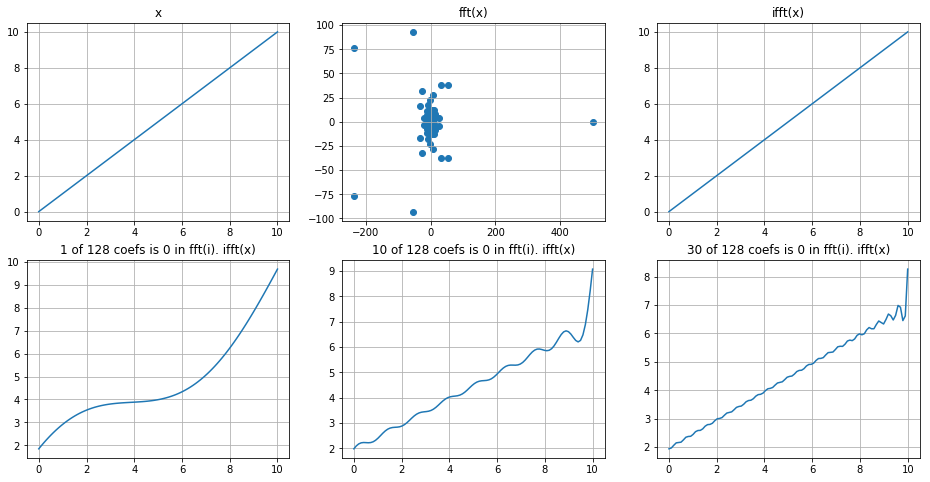

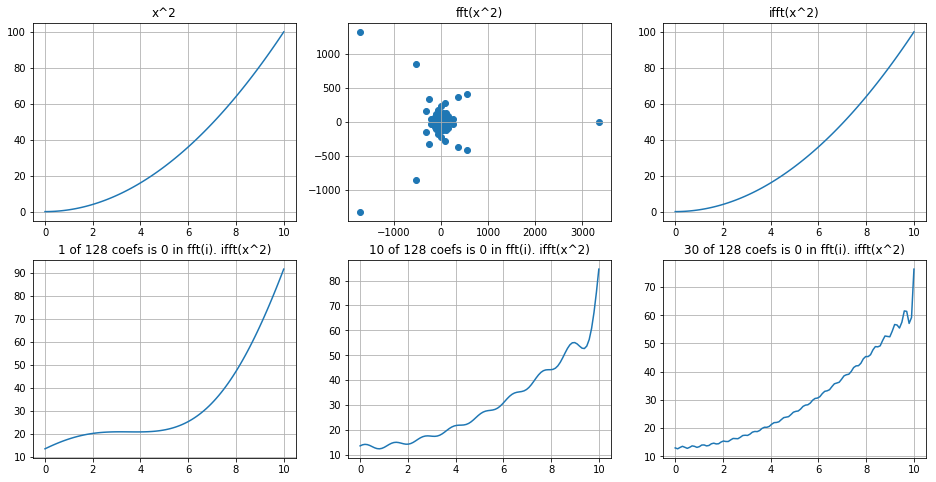

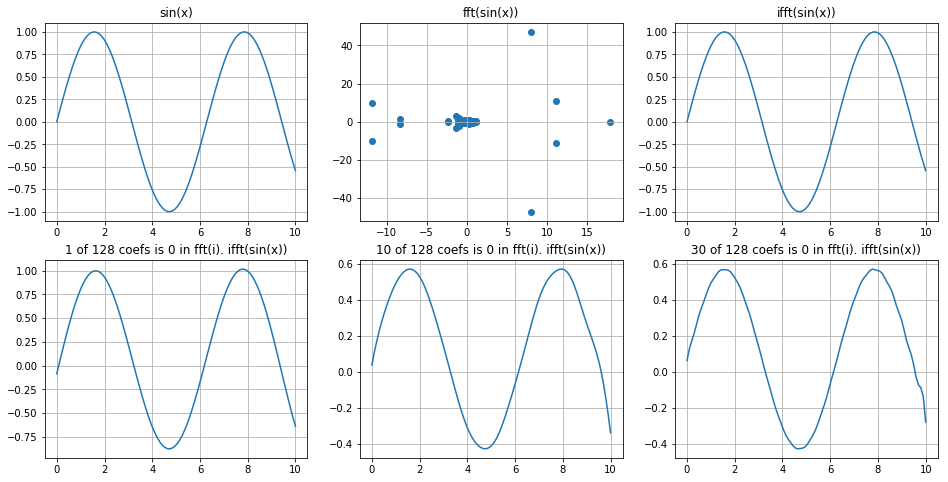

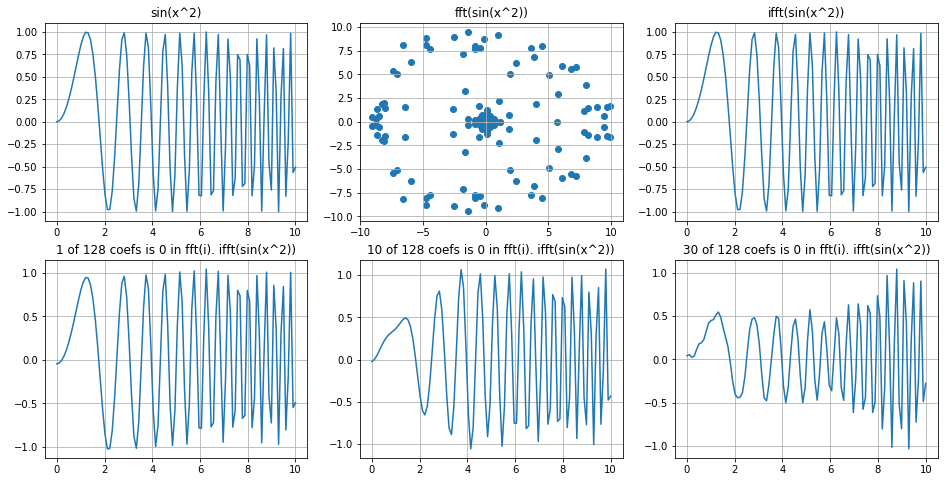

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


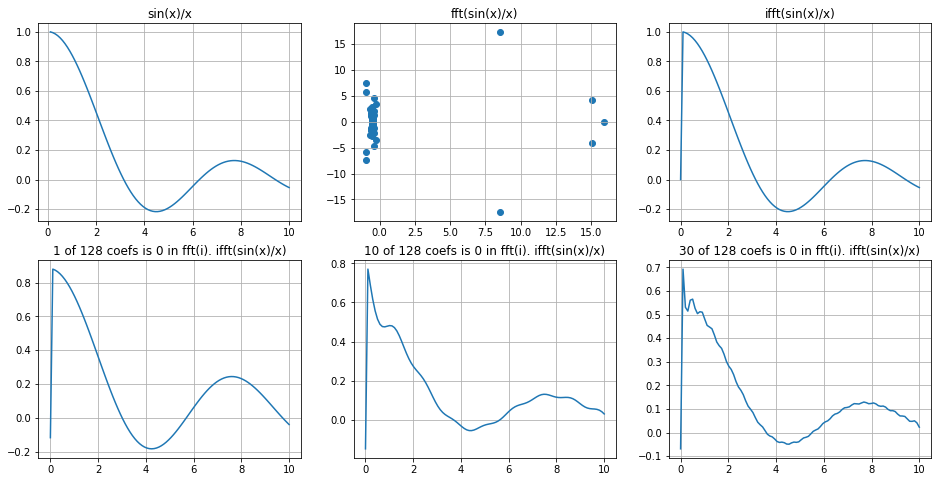

In [5]:
n_D = [1, 10, 30]

for f_name in functions:
    f = functions[f_name](X)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.plot(X, f)
    plt.grid()
    plt.title(f_name)
    
    c_temp = fft(np.concatenate((f, np.zeros(28))))
    plt.subplot(232)
    plt.scatter(np.real(c_temp), np.imag(c_temp))
    plt.grid()
    plt.title('fft({0})'.format(f_name))
    
    f_hat = ifft(c_temp)[:X.shape[0]]
    plt.subplot(233)
    plt.plot(X, np.real(f_hat))
    plt.grid()
    plt.title('ifft({0})'.format(f_name))
    
    f_hat = ifft(np.concatenate((c_temp[:-n_D[0]], np.zeros((n_D[0])))))[:X.shape[0]]
    plt.subplot(234)
    plt.plot(X, np.real(f_hat))
    plt.grid()
    plt.title('{0} of {1} coefs is 0 in fft(i). ifft({2})'.format(n_D[0], c_temp.shape[0], f_name))
    
    f_hat = ifft(np.concatenate((c_temp[:-n_D[1]], np.zeros((n_D[1])))))[:X.shape[0]]
    plt.subplot(235)
    plt.plot(X, np.real(f_hat))
    plt.grid()
    plt.title('{0} of {1} coefs is 0 in fft(i). ifft({2})'.format(n_D[1], c_temp.shape[0], f_name))
    
    f_hat = ifft(np.concatenate((c_temp[:-n_D[2]], np.zeros((n_D[2])))))[:X.shape[0]]
    plt.subplot(236)
    plt.plot(X, np.real(f_hat))
    plt.grid()
    plt.title('{0} of {1} coefs is 0 in fft(i). ifft({2})'.format(n_D[2], c_temp.shape[0], f_name))
    
    plt.show()